In [1]:
from src import visualization as vis
from src import pre_process
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [ ]:
vis.visualize_images("D:/TFM/Microscopy/video/3288-1.czi")

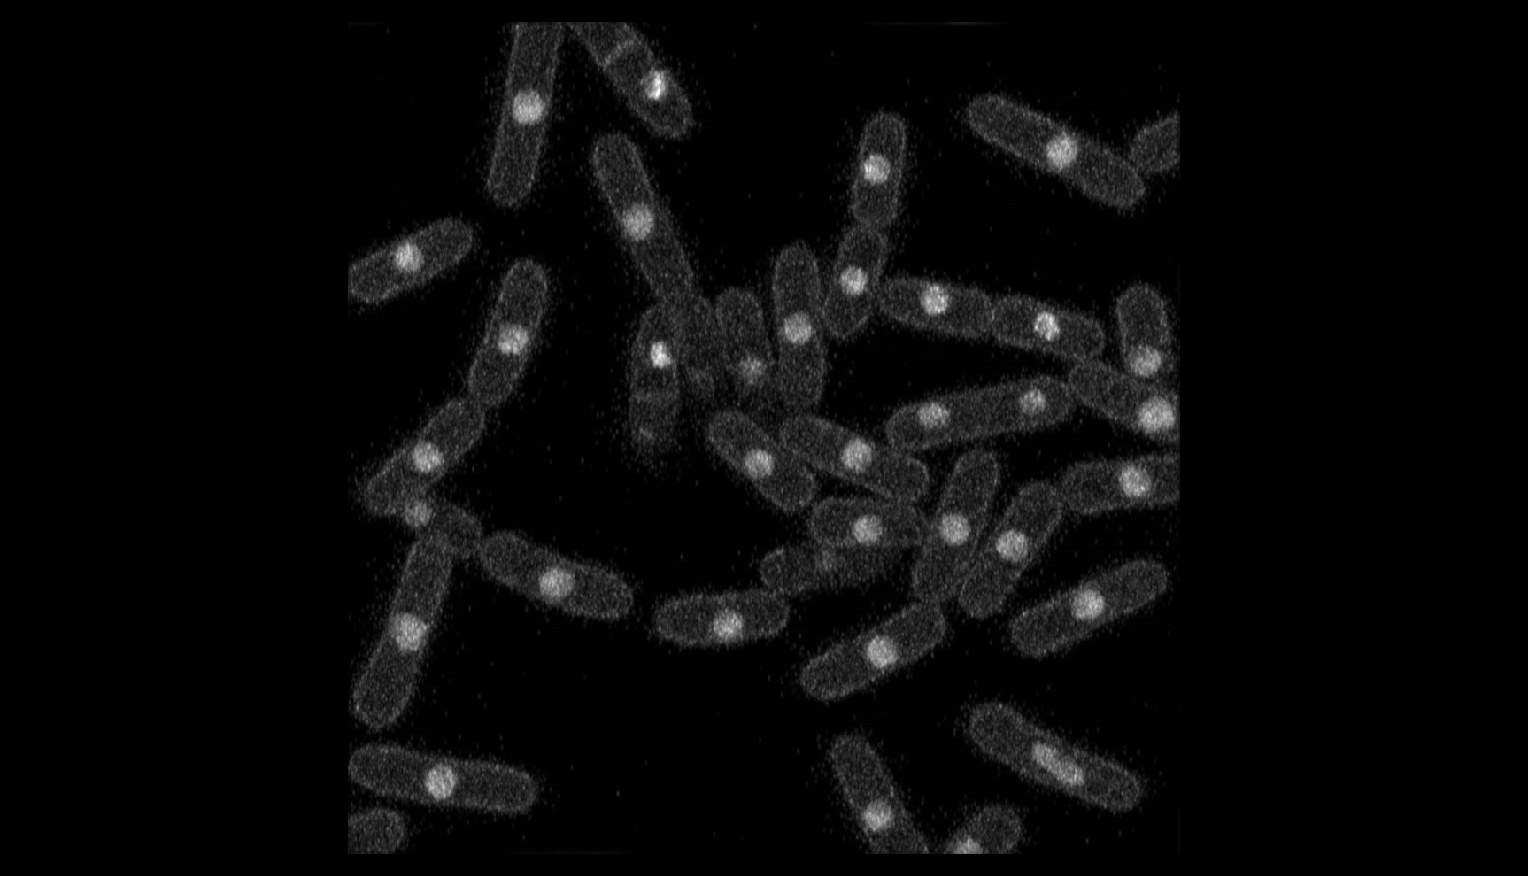

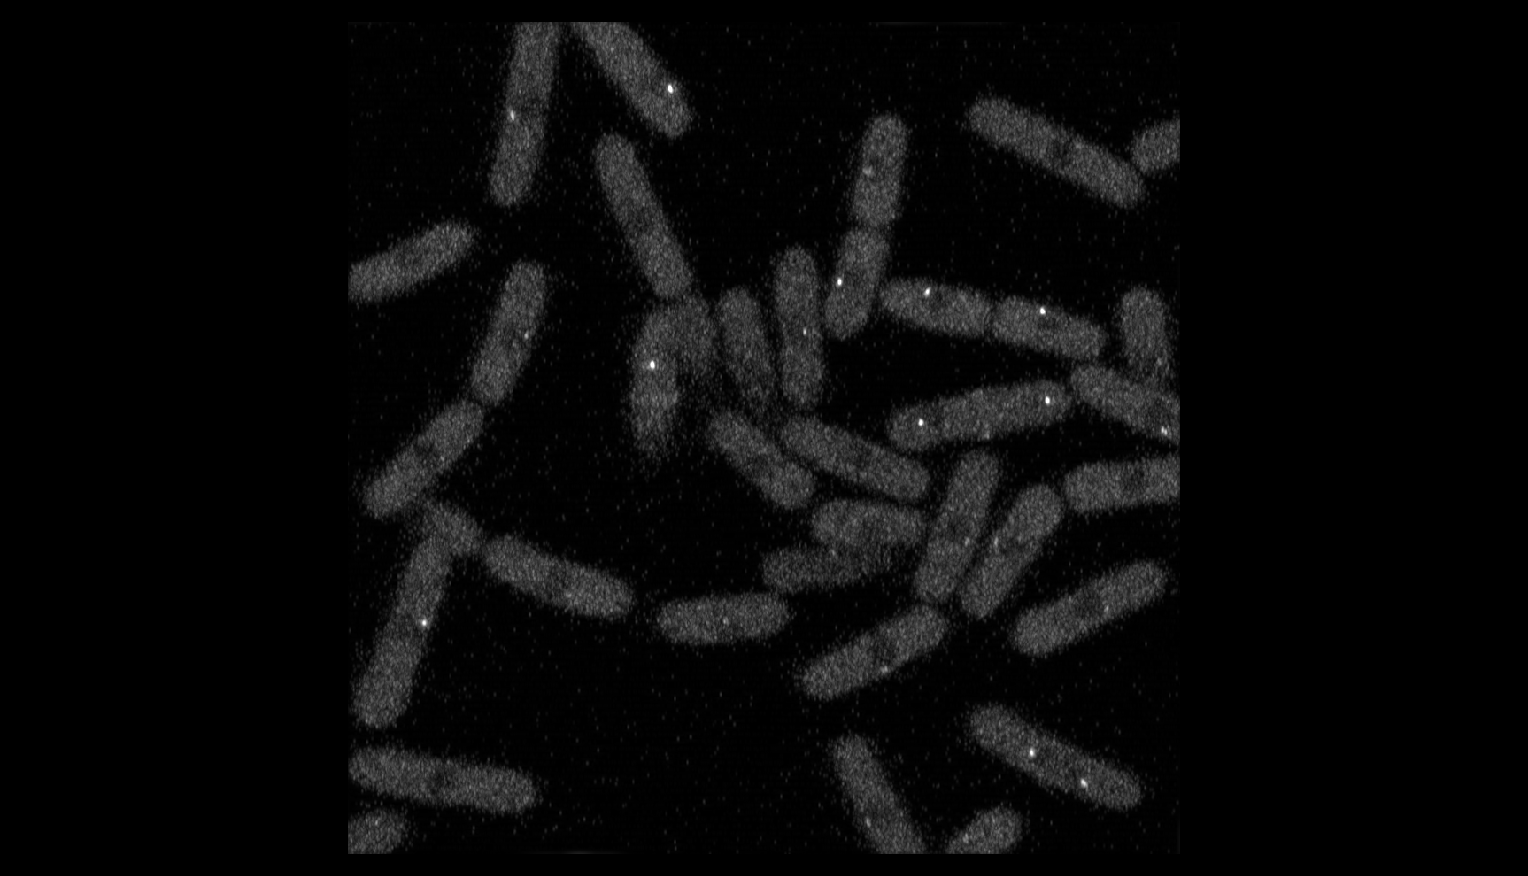

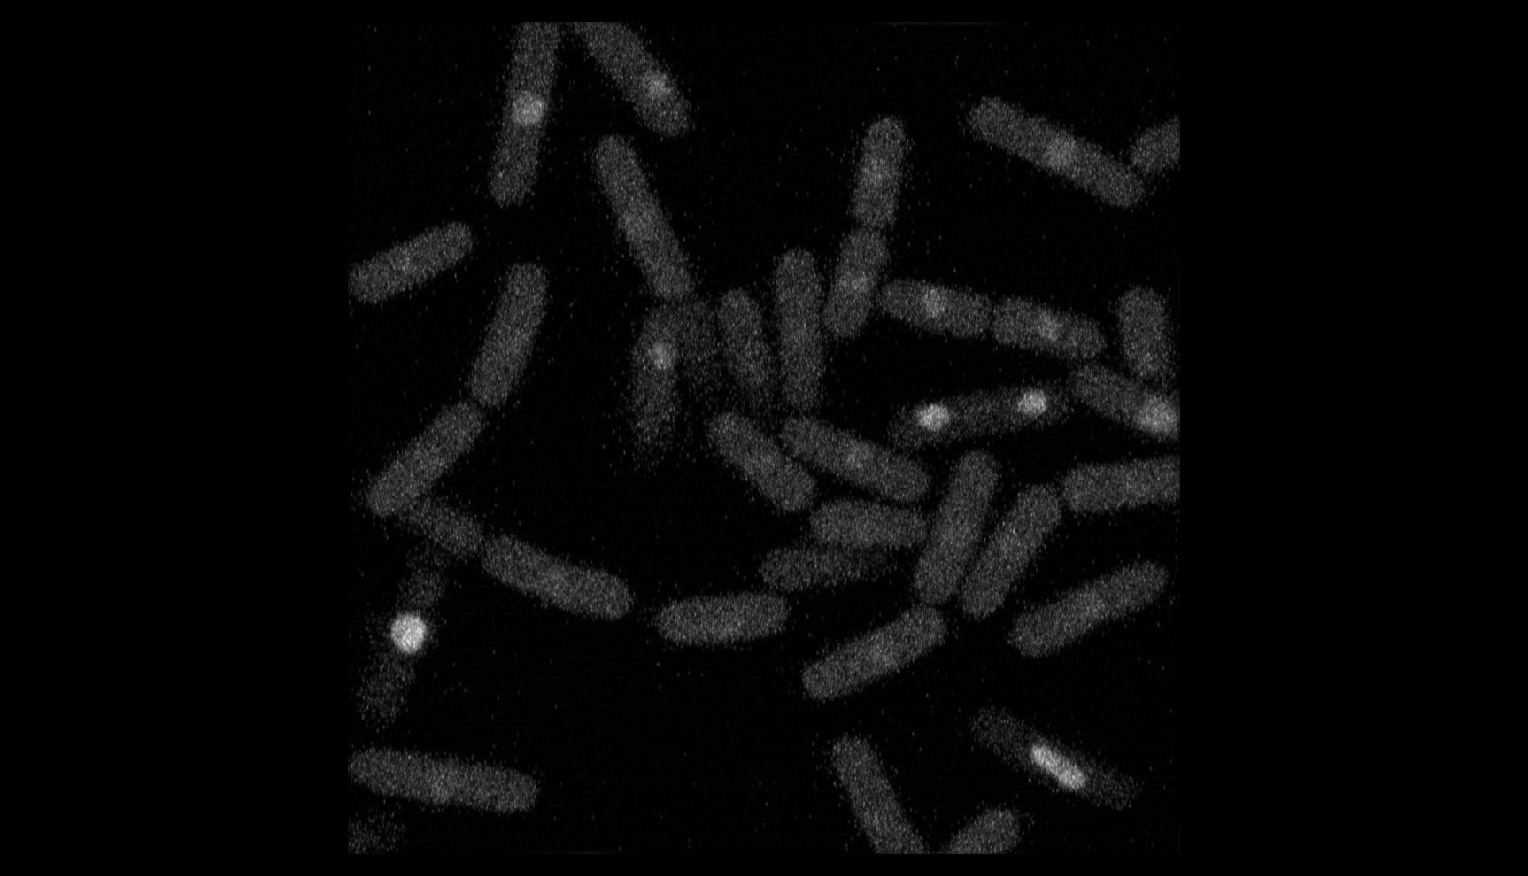

In [ ]:
vis.napari_view_splited_channels()

In [ ]:
blue_df, green_df, red_df, df = pre_process.create_df("D:/TFM/Microscopy/video/copies/channels/")
df

['D:/TFM/Microscopy/video/copies/channels/blue', 'D:/TFM/Microscopy/video/copies/channels/green', 'D:/TFM/Microscopy/video/copies/channels/red']


,File_path,Image_id,Channel,Sample,Duplicates,Timepoints,Label
0,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0000,red,3288,1,0000,2
1,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0001,red,3288,1,0001,2
2,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0002,red,3288,1,0002,2
3,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0003,red,3288,1,0003,2
4,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0004,red,3288,1,0004,2
...,...,...,...,...,...,...,...
598,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0196,green,3288,1,0196,1
599,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0197,green,3288,1,0197,1
600,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0198,green,3288,1,0198,1
601,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0199,green,3288,1,0199,1


In [ ]:
df.to_csv("C:/Users/saraa/TFM/Microscopy/data/rgb", index = True)
df

,File_path,Image_id,Channel,Sample,Duplicates,Timepoints,Label
0,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0000,red,3288,1,0000,2
1,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0001,red,3288,1,0001,2
2,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0002,red,3288,1,0002,2
3,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0003,red,3288,1,0003,2
4,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0004,red,3288,1,0004,2
...,...,...,...,...,...,...,...
598,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0196,green,3288,1,0196,1
599,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0197,green,3288,1,0197,1
600,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0198,green,3288,1,0198,1
601,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0199,green,3288,1,0199,1


In [ ]:
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(df)

The proportion of train x data is: Channel
green    0.334025
red      0.334025
blue     0.331950
Name: count, dtype: float64
The proportion of valid x data is: Channel
blue     0.338843
green    0.330579
red      0.330579
Name: count, dtype: float64


In [ ]:
train_x

,File_path,Image_id,Channel,Sample,Duplicates,Timepoints
432,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0030,green,3288,1,0030
65,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0065,red,3288,1,0065
492,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0090,green,3288,1,0090
147,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0147,red,3288,1,0147
544,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0142,green,3288,1,0142
...,...,...,...,...,...,...
141,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0141,red,3288,1,0141
506,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0104,green,3288,1,0104
281,D:/TFM/Microscopy/video/copies/channels/blue\3...,3288-1b0080,blue,3288,1,0080
171,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0171,red,3288,1,0171


In [ ]:
valid_x

,File_path,Image_id,Channel,Sample,Duplicates,Timepoints
449,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0047,green,3288,1,0047
575,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0173,green,3288,1,0173
46,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0046,red,3288,1,0046
591,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0189,green,3288,1,0189
95,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0095,red,3288,1,0095
...,...,...,...,...,...,...
76,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0076,red,3288,1,0076
508,D:/TFM/Microscopy/video/copies/channels/green\...,3288-1g0106,green,3288,1,0106
271,D:/TFM/Microscopy/video/copies/channels/blue\3...,3288-1b0070,blue,3288,1,0070
78,D:/TFM/Microscopy/video/copies/channels/red\32...,3288-1r0078,red,3288,1,0078


In [ ]:
def split_shutil_train_val():
    # 1. Creating folders 
    data_path = "D:/TFM/Microscopy/video/copies/"
    folder_names= ["train_folder", "val_folder"]
    pre_process.createfolders(data_path,folder_names)

    # 2. Spliting data
    import shutil
    dfs = [train_x, valid_x]
    paths = ["D:/TFM/Microscopy/video/copies/train_folder/", "D:/TFM/Microscopy/video/copies/val_folder/"]
    for path, df in zip(paths, dfs):
        try: 
            pre_process.move_images(df, path)
        except shutil.Error:
            print(f"The files already exist in the destination path: {path}")

split_shutil_train_val()

Folder train_folder already exists at: D:/TFM/Microscopy/video/copies/train_folder
Folder val_folder already exists at: D:/TFM/Microscopy/video/copies/val_folder


In [ ]:
def create_shutil_labels():
    # 1. Creating folders 
    train_path = "D:/TFM/Microscopy/video/copies/train_folder"
    val_path = "D:/TFM/Microscopy/video/copies/val_folder"
    folder_names= ["red", "green", "blue"]
    pre_process.createfolders(train_path,folder_names)
    pre_process.createfolders(val_path,folder_names)
    
    # 2. Cretaing labels for training and validation data
    train_x["new_file_path"] = "D:/TFM/Microscopy/video/copies/train_folder/" + train_x["Image_id"] + ".tif"
    train_x["new_file_path"] = train_x["new_file_path"].astype(str)
    valid_x["new_file_path"] = "D:/TFM/Microscopy/video/copies/val_folder/" + valid_x["Image_id"] + ".tif"
    valid_x["new_file_path"] = valid_x["new_file_path"].astype(str)
   
    # 3. Save dataframe
    train_x.to_csv("C:/Users/saraa/TFM/Microscopy/data/rgb_t", index = True)
    valid_x.to_csv("C:/Users/saraa/TFM/Microscopy/data/rgb_v", index = True)

    # 4. Spliting data
    train_path_red = "D:/TFM/Microscopy/video/copies/train_folder/red"
    train_path_green = "D:/TFM/Microscopy/video/copies/train_folder/green"
    train_path_blue = "D:/TFM/Microscopy/video/copies/train_folder/blue"
    pre_process.images_class(train_x, train_path_red, train_path_green, train_path_blue)    

    val_path_red = "D:/TFM/Microscopy/video/copies/val_folder/red"
    val_path_green = "D:/TFM/Microscopy/video/copies/val_folder/green"
    val_path_blue = "D:/TFM/Microscopy/video/copies/val_folder/blue"
    pre_process.images_class(valid_x, val_path_red, val_path_green, val_path_blue)
    
create_shutil_labels()    

Folder red already exists at: D:/TFM/Microscopy/video/copies/train_folder\red
Folder green already exists at: D:/TFM/Microscopy/video/copies/train_folder\green
Folder blue already exists at: D:/TFM/Microscopy/video/copies/train_folder\blue
Folder red already exists at: D:/TFM/Microscopy/video/copies/val_folder\red
Folder green already exists at: D:/TFM/Microscopy/video/copies/val_folder\green
Folder blue already exists at: D:/TFM/Microscopy/video/copies/val_folder\blue


In [42]:
import cv2
import os
import czifile
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import ndimage as ndi
from skimage import morphology, filters
from skimage.io import imread
from skimage.measure import regionprops

# Original image --> gray scale --> gaussian filter --> binarization --> erosion --> substraction

def nuclei_detection(czi_path):
    # 1. Load CZI file, original image 
    czi_data = czifile.imread(czi_path)
    print(czi_data.shape) # returns tuple of dimension sizes in STCZYX order (Scene, Time, Channel, Slice, Height, Width)

    for i in range(czi_data.shape[1]):
        image_plane = czi_data[0][i][0][0]  

        # 2. Convert the image to grayscale 
        if image_plane.shape[-1] == 3:
            image_plane = cv2.cvtColor(image_plane,cv2.COLOR_BGR2GRAY)

        # 3. Gaussian filter  
        smooth = filters.gaussian(image_plane, sigma=1.5)

        # 4. Otsu threshold application
        threshold_value = filters.threshold_otsu(smooth)
        thresh = smooth < threshold_value

        # 5. Fill holes
        fill = ndi.binary_fill_holes(thresh)

        # 6. Perform dilation and erosion of the nucleus
        erode = morphology.binary_erosion(fill)
        dil = morphology.binary_dilation(erode)

        # 7. Display the mask
        plt.imshow(dil, cmap='binary')
        plt.axis('off')
        plt.savefig(f'c:/Users/saraa/TFM/mask/nuclei/Mask_{i}.png')
        plt.close()

czi_path = "D:\\TFM\\Microscopy\\video\\3288-1copia.czi"
nuclei_detection(czi_path)

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
def nuclei_quantification(folder):
    results_dict = {}

    for frame in os.listdir(folder):
        frame_path = os.path.join(folder, frame)
        if os.path.isfile(frame_path):
            # 1. Load the images mask
            img = imread(frame_path)
            # Use the regionprops function to analyze the properties of the nuclei regions
            props = regionprops(img, 'Area')

            # Count the number of nuclei
            num_nuclei = len(props)

            # Display the number of nuclei and save it 
            nuclei_data = []
            nuclei_data.append({'Num nuclei': num_nuclei})
            list_name = f'nuclei_data_{frame}'
            results_dict[list_name] = nuclei_data

    return results_dict

nuclei = nuclei_quantification("C:\\Users\\saraa\\TFM\\mask\\nuclei\\")

In [47]:
import czifile
from skimage import morphology, filters
from skimage.restoration import rolling_ball 
import matplotlib.pyplot as plt

def meiosis_quantification(czi_path):
    # Load CZI file
    czi_data = czifile.imread(czi_path)
    print(czi_data.shape) # returns tuple of dimension sizes in STCZYX order
    # Scene, Time, Channel, Slice, Height, Width
    # print(czi_data)
    # Select the desired image plane (adjust the indices as needed)  czi_data.shape[1]
    # for i in range(czi_data.shape[1]):
    for i in range(czi_data.shape[1]):
        image_plane = czi_data[0][i][2][0]  

        # 2. Convert the image to grayscale 
        if image_plane.shape[-1] == 3:
            image_plane = cv2.cvtColor(image_plane,cv2.COLOR_BGR2GRAY)

        # 3. Gaussian filter  
        smooth = filters.gaussian(image_plane, sigma=1.5)

        # 4. Otsu threshold application
        threshold_value = filters.threshold_otsu(smooth)
        thresh = smooth < threshold_value

        # 5. Fill holes
        fill = ndi.binary_fill_holes(thresh)

        # 6. Perform dilation and erosion of the nucleus
        dil = morphology.binary_dilation(fill)
        erode = morphology.binary_erosion(dil)
        # mask = (dil, ~erode)

        # 7. Display the mask
        plt.imshow(erode, cmap='binary')
        plt.axis('off')
        plt.savefig(f'c:/Users/saraa/TFM/mask/meiosis/Mask_{i}.png')
        plt.close()

czi_path = "D:\\TFM\\Microscopy\\video\\3288-1copia.czi"
meiosis_quantification(czi_path)


(1, 201, 3, 1, 940, 940, 1)


In [53]:
def mask(czi_path):
    # Load CZI file
    czi_data = czifile.imread(czi_path)
    print(czi_data.shape) # returns tuple of dimension sizes in STCZYX order
    # Scene, Time, Channel, Slice, Height, Width
    # print(czi_data)
    # Select the desired image plane (adjust the indices as needed)  czi_data.shape[1]
    # for i in range(czi_data.shape[1]):
    for i in range(czi_data.shape[1]):
        for j in range(czi_data.shape[2]):
            image_plane = czi_data[0][i][j][0]  

            # 2. Convert the image to grayscale 
            if image_plane.shape[-1] == 3:
                image_plane = cv2.cvtColor(image_plane,cv2.COLOR_BGR2GRAY)

            # 3. Gaussian filter  
            smooth = filters.gaussian(image_plane, sigma=1.5)

            # 4. Otsu threshold application
            threshold_value = filters.threshold_otsu(smooth)
            thresh = smooth < threshold_value

            # 5. Fill holes
            fill = ndi.binary_fill_holes(thresh)

            # 6. Perform dilation and erosion of the nucleus
            dil = morphology.binary_dilation(fill)
            erode = morphology.binary_erosion(dil)

            # 7. Display the mask
            if j == 0: #Red channel --> nuclei mask 
                plt.imshow(erode, cmap='binary')
                plt.axis('off')
                plt.savefig(f'c:/Users/saraa/TFM/mask/nuclei/nuclei_mask_{i}.png')

            elif j == 1: 
                plt.imshow(erode, cmap='binary')
                plt.axis('off')
                plt.savefig(f'c:/Users/saraa/TFM/mask/citoplasm/cito_mask_{i}.png')

            else:
                plt.imshow(erode, cmap='binary')
                plt.axis('off')
                plt.savefig(f'c:/Users/saraa/TFM/mask/meiosis/meiosis_mask_{i}.png')
                

czi_path = "D:\\TFM\\Microscopy\\video\\3288-1copia.czi"
mask(czi_path)


(1, 201, 3, 1, 940, 940, 1)


In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("C:\\Users\\saraa\\TFM")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

##### CONFIGURATION

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Create model and train 

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

class_names = ['nuclei', 'citoplasm', 'meiosis']

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])